source: 
- https://www.kaggle.com/mehmetlaudatekman/text-classification-svm-explained
- https://www.kaggle.com/jackttai/coronavirus-tweets-nlp-using-logistic-regression

Steps:
   - Prepare environment <br>
   - Data overview <br>
   - Data preprocessing <br>
   - SVM classifier modelling <br>

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import pickle
import time
import re

In [2]:
train_set = pd.read_csv('Corona_NLP_train.csv',encoding="latin1")
test_set = pd.read_csv('Corona_NLP_test.csv',encoding="latin1")

train_set.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [3]:
test_set.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [4]:
# Check missing data
train_set.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [5]:
# Check missing data
test_set.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

#### Data EDA ( Exploratory Data Analysis)

In [6]:
# concat data
df = pd.concat([train_set, test_set])
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


##### drop unrelevant features

In [7]:
unrelevant_features = ["UserName","ScreenName","Location","TweetAt"]
df.drop(unrelevant_features,inplace=True,axis=1)
df

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,Did you panic buy a lot of non-perishable item...,Negative
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,Gov need to do somethings instead of biar je r...,Extremely Negative


In [8]:
# types of classifications
df["Sentiment"].value_counts()

Positive              12369
Negative              10958
Neutral                8332
Extremely Positive     7223
Extremely Negative     6073
Name: Sentiment, dtype: int64

Text(0, 0.5, 'Number of tweets')

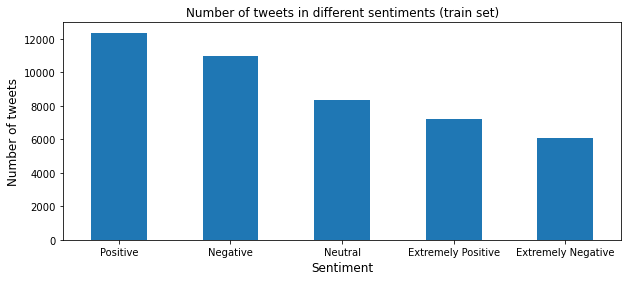

In [9]:
df.Sentiment.value_counts().plot.bar(figsize=(10,4))
plt.xticks(rotation=None)
plt.title('Number of tweets in different sentiments (train set)',fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)

In [10]:
# extremely positive -> positvive
# extremely negative -> negative
df['Sentiment'] = df.Sentiment.str.replace('Extremely Positive', 'Positive')
df['Sentiment'] = df.Sentiment.str.replace('Extremely Negative', 'Negative')

Positive    19592
Negative    17031
Neutral      8332
Name: Sentiment, dtype: int64


Text(0, 0.5, 'Number of tweets')

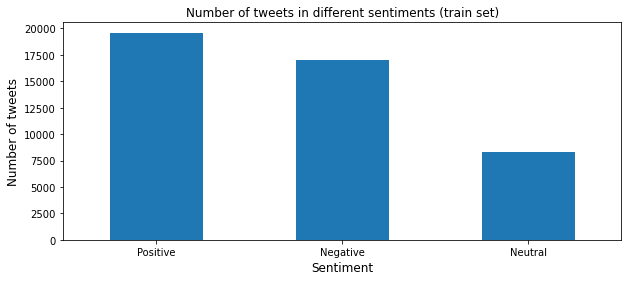

In [11]:
print(df["Sentiment"].value_counts())

df.Sentiment.value_counts().plot.bar(figsize=(10,4))
plt.xticks(rotation=None)
plt.title('Number of tweets in different sentiments (train set)',fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)

In [12]:
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative


In [13]:
# Map the sentiment into 0 , 1, 2
df['Sentiment'] = df['Sentiment'].map({'Positive':2, 'Negative':0, 'Neutral':1})

In [14]:
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1
1,advice Talk to your neighbours family to excha...,2
2,Coronavirus Australia: Woolworths to give elde...,2
3,My food stock is not the only one which is emp...,2
4,"Me, ready to go at supermarket during the #COV...",0


In [15]:
neg_tweets = df[df.Sentiment == 0]
neg_string = []
for t in neg_tweets.OriginalTweet:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

Dataset negative tweets WordCloud

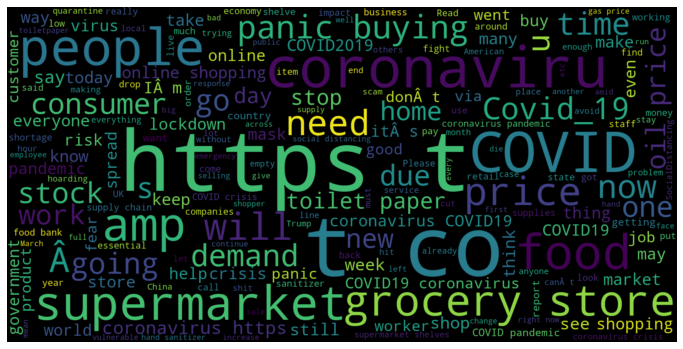

In [16]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Dataset positive tweets WordCloud

In [17]:
pos_tweets = df[df.Sentiment == 2]
pos_string = []
for t in pos_tweets.OriginalTweet:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

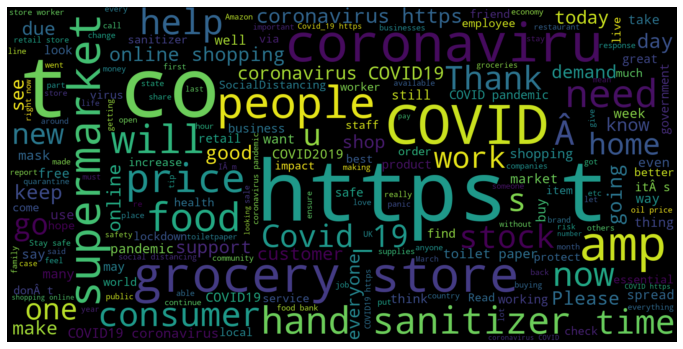

In [18]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

From the wordcloud above, we can observe that there are noises in the tweets, pre-processing is needed

In [19]:
del train_set
del test_set
del pos_string
del neg_string
del pos_tweets
del neg_tweets

#### Data Pre-Processing

In [20]:
cleanedData = []

lemma = WordNetLemmatizer()
swords = stopwords.words("english")
for text in df["OriginalTweet"]:
    
    # Cleaning links
    text = re.sub(r'http\S+', '', text)
    
    # Cleaning everything except alphabetical and numerical characters
    text = re.sub("[^a-zA-Z0-9]"," ",text)
    
    # Tokenizing and lemmatizing
    text = nltk.word_tokenize(text.lower())
    text = [lemma.lemmatize(word) for word in text]
    
    # Removing stopwords
    text = [word for word in text if word not in swords]
    
    # Joining
    text = " ".join(text)
    
    cleanedData.append(text)

In [21]:
cleanedData

['menyrbie phil gahan chrisitv',
 'advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shopping account po adequate supply regular med order',
 'coronavirus australia woolworth give elderly disabled dedicated shopping hour amid covid 19 outbreak',
 'food stock one empty please panic enough food everyone take need stay calm stay safe covid19france covid 19 covid19 coronavirus confinement confinementotal confinementgeneral',
 'ready go supermarket covid19 outbreak paranoid food stock litteraly empty coronavirus serious thing please panic cause shortage coronavirusfrance restezchezvous stayathome confinement',
 'news region first confirmed covid 19 case came sullivan county last week people flocked area store purchase cleaning supply hand sanitizer food toilet paper good tim dodson report',
 'cashier grocery store wa sharing insight covid 19 prove credibility commented civics class know talking',
 'wa supermar

##### Create BOW, with 10k most mentioned words

In [22]:
vectorizer = CountVectorizer(max_features=10000)
BOW = vectorizer.fit_transform(cleanedData)

In [23]:
vectorizer.get_feature_names()

<bound method CountVectorizer.get_feature_names of CountVectorizer(max_features=10000)>

##### Train:Test 90:10

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(BOW, np.asarray(df["Sentiment"]), test_size=0.1,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40459, 10000)
(4496, 10000)
(40459,)
(4496,)


#### Train and Test Model: SVM

In [41]:
from sklearn.svm import SVC
start_time = time.time()

svm = SVC()
svm.fit(x_train,y_train)

end_time = time.time()
process_time = round(end_time-start_time,2)
print("Fitting SVC took {} seconds".format(process_time))

Fitting SVC took 1241.16 seconds


In [42]:
%%time

from sklearn.metrics import accuracy_score
start_time = time.time()

predictions = svm.predict(x_test)
print("Accuracy of model is {}%".format(accuracy_score(y_test,predictions) * 100))

Accuracy of model is 79.49288256227757%
Wall time: 38.8 s


In [43]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10)
svm_cv = SVC()

for train_index, test_index in kfold.split(x_train):
    X_train_cv, X_test_cv = x_train[train_index], x_train[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
    svm_cv.fit(X_train_cv, y_train_cv)
    y_pred_cv = svm_cv.predict(X_test_cv)
    #matrix1 = confusion_matrix(y_test, y_pred1)
    print('SVM-KFold',accuracy_score(y_test_cv, y_pred_cv))

end_time = time.time()
process_time = round(end_time-start_time,2)
print("Fitting SVC took {} seconds".format(process_time))

SVM-KFold 0.7689075630252101
SVM-KFold 0.7820069204152249
SVM-KFold 0.7797825012357884
SVM-KFold 0.7728620860108749
SVM-KFold 0.7691547207118141
SVM-KFold 0.7800296589223925
SVM-KFold 0.7800296589223925
SVM-KFold 0.7738507167572911
SVM-KFold 0.7773109243697479
SVM-KFold 0.7809641532756489
Fitting SVC took 10037.0 seconds


In [46]:
print ("SVC test score before KFold: ", svm.score(x_train, y_train))
print ("SVC test score after KFold: ", svm_cv.score(x_train, y_train))
print ("SVC Accuracy after KFold: ", accuracy_score(y_test, svm_cv.predict(x_test)))

SVC test score before KFold:  0.9383326330359129
SVC test score after KFold:  0.922538866506834
SVC Accuracy after KFold:  0.7893683274021353


In [48]:
# Models Comparison
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    SVC(),
    MultinomialNB(),
    LogisticRegression()
]

# 5 Cross-validation
kf = KFold(n_splits = 10)

entries = []
for model in models:
    print("Trying Model ", model)
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=kf).mean()*100
    #for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, accuracies))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])

Trying Model  RandomForestClassifier(max_depth=5, random_state=0)
Trying Model  LinearSVC()


C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Trying Model  SVC()


KeyboardInterrupt: 

In [ ]:
cv_df